In [20]:
import pandas as pd

In [21]:
df_features = pd.read_csv("C:/Users/ACER/OneDrive - University of Jaffna/UOJ/Education/Research/Data Sets/GSE160310/totalRNA/Notebooks/data1.csv", index_col=0)
df_targets = pd.read_csv("C:/Users/ACER/OneDrive - University of Jaffna/UOJ/Education/Research/Data Sets/GSE160310/totalRNA/Notebooks/Dignosis.csv", index_col=0)


In [22]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, sample_01 to sample_80
Columns: 58051 entries, ENSG00000000003 to ENSG00000283699
dtypes: int64(58051)
memory usage: 35.0+ MB


In [23]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, sample_01 to sample_80
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Disese Group  79 non-null     int64
dtypes: int64(1)
memory usage: 1.2+ KB


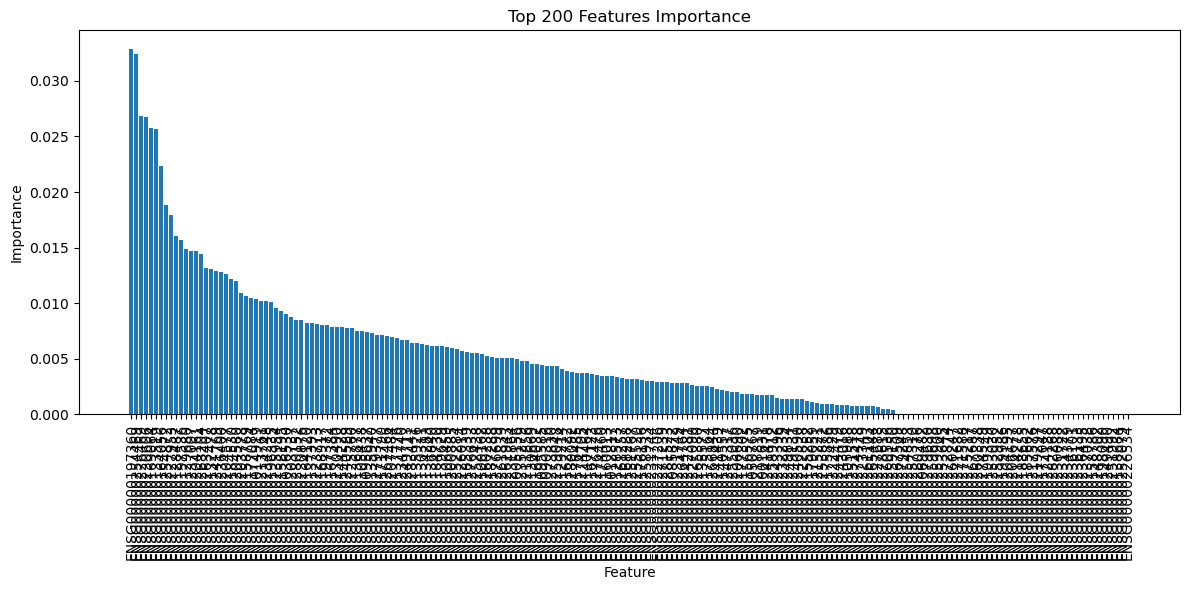

Top 200 Features: ['ENSG00000001631', 'ENSG00000005156', 'ENSG00000012817', 'ENSG00000014919', 'ENSG00000036530', 'ENSG00000050767', 'ENSG00000069482', 'ENSG00000085872', 'ENSG00000090316', 'ENSG00000095585', 'ENSG00000095637', 'ENSG00000100162', 'ENSG00000105438', 'ENSG00000105988', 'ENSG00000106459', 'ENSG00000128487', 'ENSG00000128573', 'ENSG00000129214', 'ENSG00000129680', 'ENSG00000130311', 'ENSG00000130669', 'ENSG00000132478', 'ENSG00000133519', 'ENSG00000134283', 'ENSG00000135577', 'ENSG00000135926', 'ENSG00000135940', 'ENSG00000136840', 'ENSG00000136877', 'ENSG00000137393', 'ENSG00000137776', 'ENSG00000138684', 'ENSG00000139629', 'ENSG00000140464', 'ENSG00000140557', 'ENSG00000144228', 'ENSG00000155252', 'ENSG00000156575', 'ENSG00000158195', 'ENSG00000158769', 'ENSG00000158786', 'ENSG00000160013', 'ENSG00000162722', 'ENSG00000164032', 'ENSG00000164056', 'ENSG00000164120', 'ENSG00000167123', 'ENSG00000167384', 'ENSG00000168288', 'ENSG00000168917', 'ENSG00000169064', 'ENSG0000017

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' contains your dataset

X = df_features
y = df_targets['Disese Group']

Feature_Names = X.columns

# Perform feature selection using mutual information with a classifier
# k_values = [10, 15, 25, 50, 100, 150,175,180, 200]  # Number of top features to select
k_values = [200]
# Create a dictionary to store the selected features for each k value
selected_features_dict = {}

for k in k_values:
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_new = selector.fit_transform(X, y)

    selected_features = [Feature_Names[i]
                         for i in selector.get_support(indices=True)]

    selected_features_dict[k] = selected_features

    # Use a RandomForestClassifier to get feature importances
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_new, y)
    feature_importances = clf.feature_importances_

    # Sort features by importance
    sorted_idx = np.argsort(feature_importances)[::-1]
    # Select the top 100 most important features
    top_features = sorted_idx[:200]

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.title(f"Top {k} Features Importance")
    plt.bar(range(len(top_features)),
            feature_importances[top_features], align="center")
    plt.xticks(range(len(top_features)), [
               selected_features[i] for i in top_features], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

    new_df = pd.DataFrame(X_new, columns=selected_features,
                          index=df_features.index)
    new_df['Diagnosis'] = y.values

    # Save the DataFrame to a CSV file with a custom path and a name indicating the value of k
    file_path = f"C:/Users/ACER/OneDrive - University of Jaffna/UOJ/Education/Research/Data Sets/GSE160310/totalRNA/Feature Selection/Information Gain/data_k_{k}.csv"
    new_df.to_csv(file_path)

# Print the selected features for each k value
for k, features in selected_features_dict.items():
    print(f"Top {k} Features: {features}")

# Print feature importances for the top features
for k in k_values:
    print(f"Top {k} Feature Importances:")
    top_feature_importances = [(selected_features[i], feature_importances[i])
                               for i in sorted_idx[:k]]
    for index, (feature, importance) in enumerate(top_feature_importances, start=1):
        print(f"{index} - {feature}: {importance:.4f}")
